In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/7/data/sign

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/7/data/sign


In [0]:
# 1) maxpooling

In [0]:
##############################################################

In [0]:
# 데이터 읽기. 여기서부터 시작.
import numpy as np

X = np.loadtxt('X.csv')
y = np.loadtxt('y.csv')

In [0]:
X=X.reshape(-1,40,40,3)

In [5]:
print(X.shape,'\n',y.shape,sep='')

(39209, 40, 40, 3)
(39209, 43)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31367, 40, 40, 3) (31367, 43)
(7842, 40, 40, 3) (7842, 43)


In [0]:
IMG_SIZE = 40
classes=43

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_SIZE, IMG_SIZE, 3),
                 activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 40, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [10]:
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_split=0.1
          )

Epoch 1/10
883/883 [==============================] - 9s 10ms/step - loss: 1.2517 - acc: 0.6378 - val_loss: 0.1586 - val_acc: 0.9512
Epoch 2/10
883/883 [==============================] - 8s 10ms/step - loss: 0.2106 - acc: 0.9349 - val_loss: 0.0876 - val_acc: 0.9732
Epoch 3/10
883/883 [==============================] - 8s 9ms/step - loss: 0.1276 - acc: 0.9613 - val_loss: 0.0551 - val_acc: 0.9837
Epoch 4/10
883/883 [==============================] - 8s 9ms/step - loss: 0.0970 - acc: 0.9698 - val_loss: 0.0437 - val_acc: 0.9888
Epoch 5/10
883/883 [==============================] - 8s 9ms/step - loss: 0.0833 - acc: 0.9744 - val_loss: 0.0408 - val_acc: 0.9879
Epoch 6/10
883/883 [==============================] - 8s 9ms/step - loss: 0.0811 - acc: 0.9746 - val_loss: 0.0368 - val_acc: 0.9898
Epoch 7/10
883/883 [==============================] - 8s 9ms/step - loss: 0.0672 - acc: 0.9803 - val_loss: 0.0310 - val_acc: 0.9920
Epoch 8/10
883/883 [==============================] - 8s 9ms/step - loss: 

In [11]:
model.evaluate(x_test,y_test,batch_size=32)

246/246 [==============================] - 1s 5ms/step - loss: 0.0190 - acc: 0.9954


[0.018953684717416763, 0.9954093098640442]

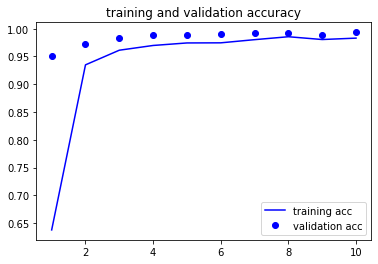

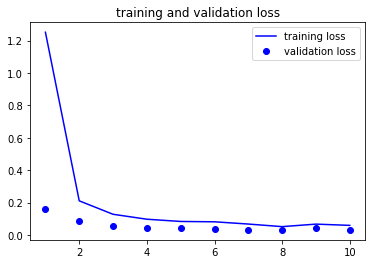

In [12]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
# 2) maxpooling 대신 convolution stride를 써서 줄여보기

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_SIZE, IMG_SIZE, 3),
                 activation='relu'))
model.add(Conv2D(32, (3, 3),strides=2, activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3, 3),
                 activation='relu'))
model.add(Conv2D(64, (3, 3), strides=2,activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(128, (3, 3), strides=2,activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 40, 40, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 19, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 17, 17, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)         

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [15]:
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_split=0.1
          )

Epoch 1/10
883/883 [==============================] - 8s 9ms/step - loss: 1.4073 - acc: 0.5913 - val_loss: 0.2380 - val_acc: 0.9260
Epoch 2/10
883/883 [==============================] - 8s 9ms/step - loss: 0.2457 - acc: 0.9223 - val_loss: 0.1019 - val_acc: 0.9653
Epoch 3/10
883/883 [==============================] - 8s 9ms/step - loss: 0.1488 - acc: 0.9541 - val_loss: 0.0862 - val_acc: 0.9755
Epoch 4/10
883/883 [==============================] - 8s 9ms/step - loss: 0.1179 - acc: 0.9642 - val_loss: 0.0574 - val_acc: 0.9818
Epoch 5/10
883/883 [==============================] - 8s 9ms/step - loss: 0.0970 - acc: 0.9708 - val_loss: 0.0638 - val_acc: 0.9818
Epoch 6/10
883/883 [==============================] - 8s 9ms/step - loss: 0.0848 - acc: 0.9744 - val_loss: 0.0561 - val_acc: 0.9828
Epoch 7/10
883/883 [==============================] - 8s 9ms/step - loss: 0.0787 - acc: 0.9760 - val_loss: 0.0466 - val_acc: 0.9857
Epoch 8/10
883/883 [==============================] - 8s 9ms/step - loss: 0.

In [16]:
model.evaluate(x_test,y_test,batch_size=32)

246/246 [==============================] - 1s 4ms/step - loss: 0.0550 - acc: 0.9861


[0.05496281385421753, 0.9861004948616028]

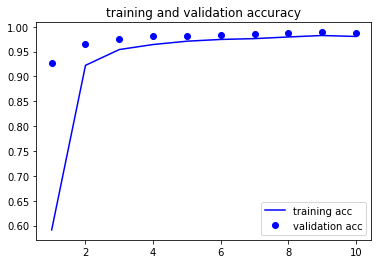

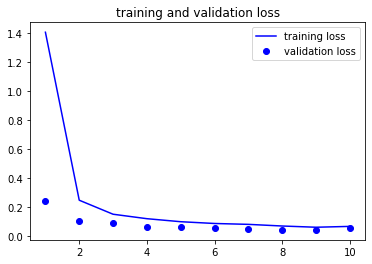

In [17]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()